# Generating Moon Dataset

**Generate Make-Moons dataset without using sklearn make_moons.**

Behind the scenes its generating a circle using sine and cosine data and adding guassian noise to the points.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **MakeMoons Function**

In [ ]:
def make_moons_from_cosine(n_samples=100, noise=0.2, seed=None, shuffle=True, vertical_offset=-0.15):
    """
    ---------------------------
    X : ndarray -> (n_samples, 2)
        Coordinates (x, y).
    y : ndarray -> (n_samples,)
        Labels 0 or 1.
    """
    rng = np.random.default_rng(seed)

    n1 = int(n_samples // 2)
    n2 = n_samples - n1

    theta1 = rng.uniform(0.0, np.pi, size=n1)
    theta2 = rng.uniform(0.0, np.pi, size=n2)

    x1 = np.cos(theta1)
    y1 = np.sin(theta1)

    x2 = 1.0 - np.cos(theta2)
    y2 = -np.sin(theta2) + vertical_offset

    X1 = np.array([x1, y1]).T
    X2 = np.array([x2, y2]).T

    X = np.vstack((X1, X2))

    zeros_arr = np.zeros(len(X1), dtype=int)
    ones_arr  = np.ones(len(X2),  dtype=int)
    y = np.concatenate((zeros_arr, ones_arr))

    X = X + rng.normal(scale=noise, size=X.shape)

    if shuffle:
        perm = rng.permutation(n_samples)
        X = X[perm]
        y = y[perm]

    return X, y

In [ ]:
def plt_moons(X, y, title="moon_dataset", show=True):
    fig, ax = plt.subplots(figsize=(8, 6))
    sc = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_title(title)

    if show:
        plt.show()

    return fig, ax


## **Different noises**

Use default noise 0.2, also create two extra test sets with noise 0.1 and 0.3 for robustness reporting.

In [ ]:
X1, y1 = make_moons_from_cosine(n_samples=1000, noise=0.2, seed=1337)
X2, y2 = make_moons_from_cosine(n_samples=1000, noise=0.1, seed=1337)
X3, y3 = make_moons_from_cosine(n_samples=1000, noise=0.3, seed=1337)

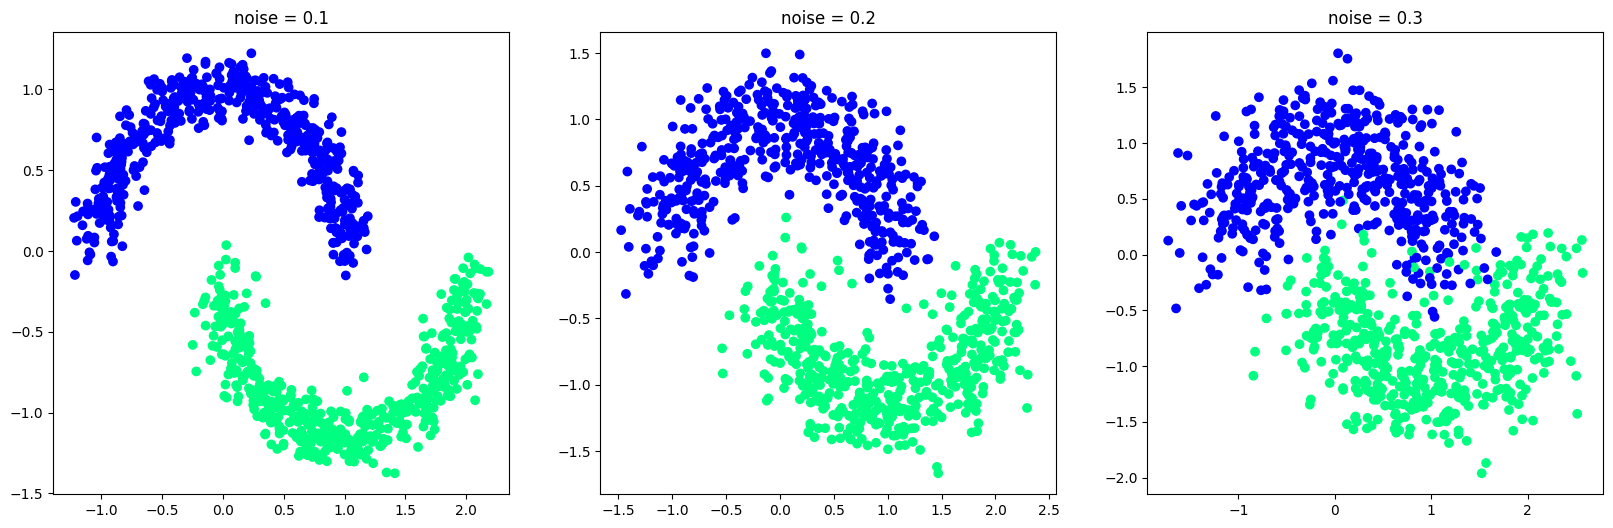

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(20, 6))
ax[1].scatter(X1[:, 0], X1[:, 1], c=y1, cmap='winter')
ax[1].set_title("noise = 0.2")

ax[0].scatter(X2[:, 0], X2[:, 1], c=y2, cmap='winter')
ax[0].set_title("noise = 0.1")

ax[2].scatter(X3[:, 0], X3[:, 1], c=y3, cmap='winter')
ax[2].set_title("noise = 0.3")

plt.show()

## **Training and Test Datasets**

Make training set and test set with 500 points each.

In [ ]:
def split_train_test(X, y, factor = 0.5, seed=None):
  '''
  Randomized split of the data into train and test sets.

    train_data_size = factor * len(X)
    test_data_size = len(X) - train_data_size
  ------------------------------------------------------------------------------------
    X_train : ndarray -> (train_data_size, 2)
              Coordinates (x, y).

    y_train : ndarray -> (train_data_size,)
              Labels 0 or 1.

    X_test  : ndarray -> (test_data_size, 2)
              Coordinates (x, y).

    y_test  : ndarray -> (test_data_size,)
              Labels 0 or 1.

  '''
  rng = np.random.default_rng(seed)

  perm = rng.permutation(len(X))
  X = X[perm]
  y = y[perm]

  train_data_size = int(factor * len(X))
  test_data_size = len(X) - train_data_size
  X_train = X[:train_data_size]
  y_train = y[:train_data_size]
  X_test = X[train_data_size:]
  y_test = y[train_data_size:]

  return X_train, y_train, X_test, y_test

Text(0.5, 1.0, 'Test Data')

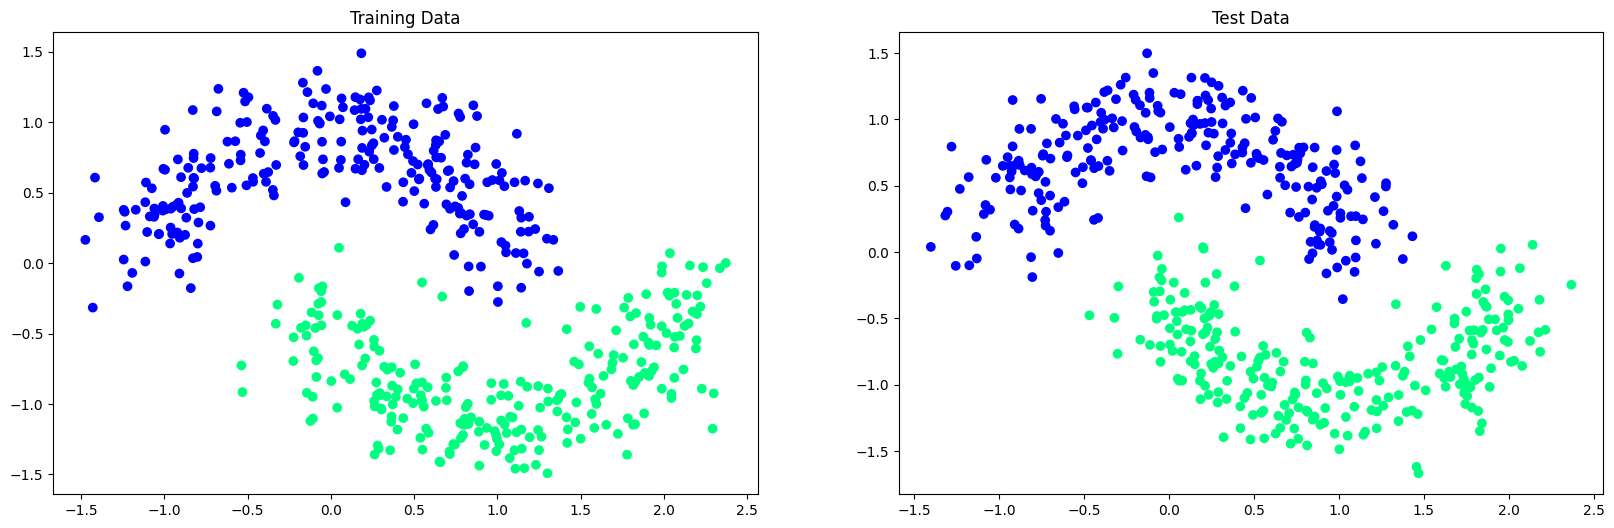

In [ ]:
X_train, y_train, X_test, y_test = split_train_test(X1, y1, factor=0.5,seed=1337)

fig, ax = plt.subplots(1, 2,figsize=(20, 6))
ax[0].scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = 'winter')
ax[0].set_title("Training Data")

ax[1].scatter(X_test[:, 0], X_test[:, 1], c = y_test, cmap = 'winter')
ax[1].set_title("Test Data")

## **Standardizing X**

Standardize X after the split using **train statistics** only.

In [ ]:
def standardize_data(X, mean, std):
  '''
  Standardizes the data using the provided mean and standard deviation.
  ----------------------------------------------------------------------
  X : ndarray -> (n_samples, 2)
      Coordinates (x, y).
  '''
  return (X - mean) / std

Text(0.5, 1.0, 'Test Data')

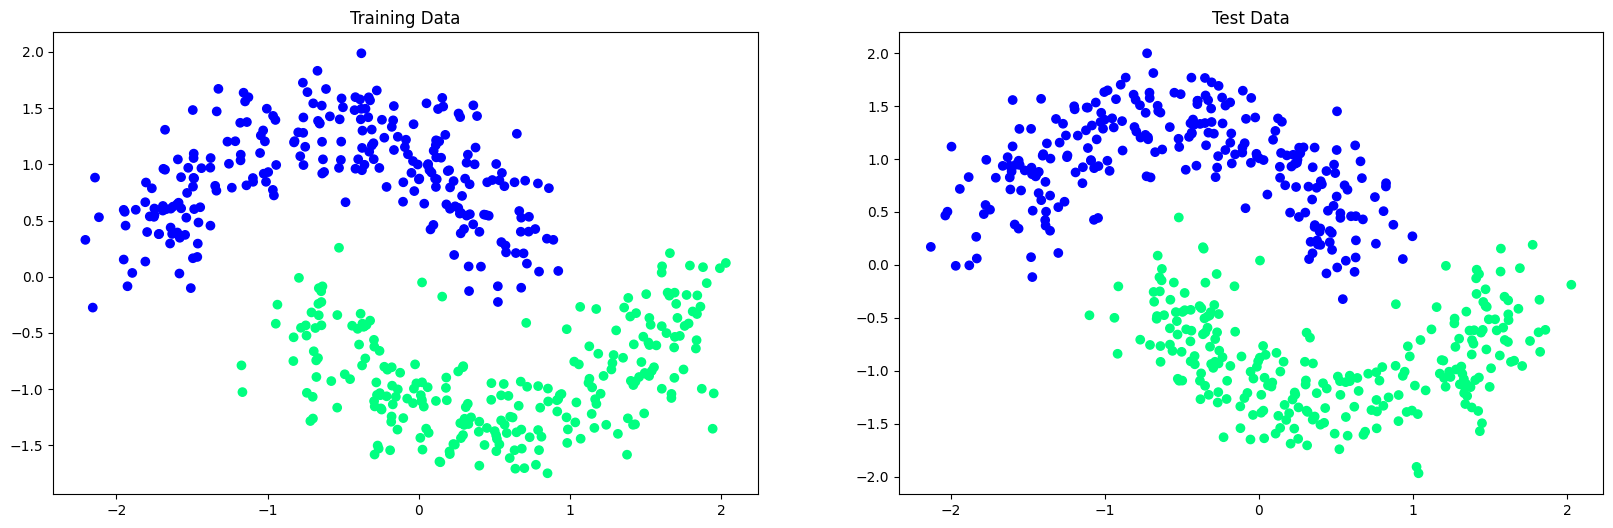

In [ ]:
mean = np.mean(X_train, axis=0)
std  = np.std(X_train, axis=0)

X_train = standardize_data(X_train, mean, std)
X_test  = standardize_data(X_test, mean, std)

fig, ax = plt.subplots(1, 2,figsize=(20, 6))
ax[0].scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = 'winter')
ax[0].set_title("Training Data")

ax[1].scatter(X_test[:, 0], X_test[:, 1], c = y_test, cmap = 'winter')
ax[1].set_title("Test Data")

## **Validation Set**

Create a validation split of the train set with 20 percent for model selection.

In [ ]:
def split_train_validation(X, y, factor = 0.2, seed = None):
  '''
  Randomized split of the data into train and validation sets.

    validation_data_size = factor * len(X)
    train_data_size = len(X) - validation_data_size
  ------------------------------------------------------------------------------------

    X_train : ndarray -> (train_data_size, 2)
              Coordinates (x, y).

    y_train : ndarray -> (train_data_size,)
              Labels 0 or 1.

    X_valid : ndarray -> (validation_data_size, 2)
              Coordinates (x, y).

    y_valid : ndarray -> (validation_data_size,)
              Labels 0 or 1.

  '''
  rng = np.random.default_rng(seed)

  perm = rng.permutation(len(X))
  X = X[perm]
  y = y[perm]

  validation_data_size = int(factor * len(X))
  train_data_size = len(X) - validation_data_size
  X_train = X[:train_data_size]
  y_train = y[:train_data_size]
  X_valid = X[train_data_size:]
  y_valid = y[train_data_size:]


  return X_train, y_train, X_valid, y_valid

Text(0.5, 1.0, 'Validation Data')

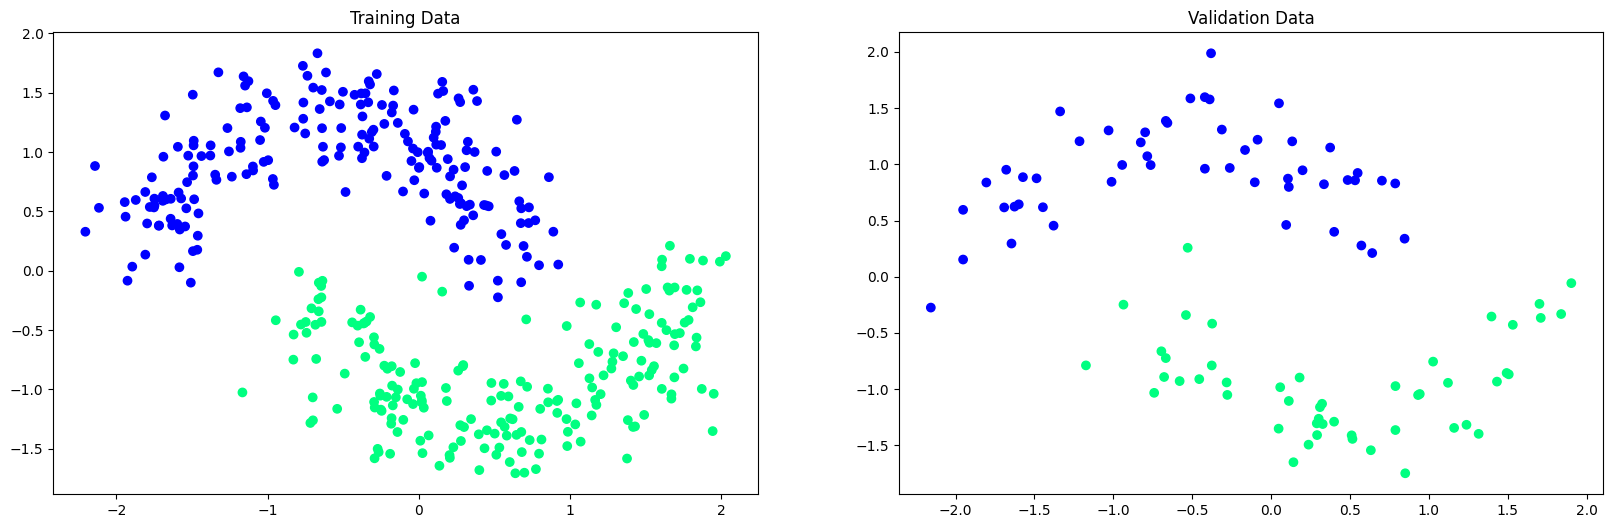

In [ ]:
X_train, y_train, X_valid, y_valid = split_train_validation(X_train, y_train, factor = 0.2, seed = 1337)

fig, ax = plt.subplots(1, 2,figsize=(20, 6))
ax[0].scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = 'winter')
ax[0].set_title("Training Data")

ax[1].scatter(X_valid[:, 0], X_valid[:, 1], c = y_valid, cmap = 'winter')
ax[1].set_title("Validation Data")

# **Structure Definations**

## **Neuron**

In [ ]:
class Neuron:
    def __init__(self, n_inputs, activation='relu'):
        self.w = np.random.randn(n_inputs) * 0.1
        self.b = 0.0
        self.activation_name = activation

    def activate(self, z):
        if self.activation_name == 'relu':
            return np.maximum(0, z)
        elif self.activation_name == 'sigmoid':
            return 1 / (1 + np.exp(-z))
        else:
            return z

    def activation_derivative(self, a):
        if self.activation_name == 'relu':
            return (a > 0).astype(float)
        elif self.activation_name == 'sigmoid':
            return a * (1 - a)
        else:
            return np.ones_like(a)

    def forward(self, x):
        self.x = x
        self.z = np.dot(x, self.w) + self.b
        self.a = self.activate(self.z)
        return self.a


## **Layer**

In [ ]:
class Layer:
    def __init__(self, n_inputs, n_neurons, activation='relu'):
        self.activation_name = activation
        self.neurons = [Neuron(n_inputs, activation) for _ in range(n_neurons)]
        self.last_input = None
        self.last_output = None

    def activation(self, x):
        if self.activation_name == 'relu':
            return np.maximum(0, x)
        elif self.activation_name == 'sigmoid':
            return 1 / (1 + np.exp(-x))
        else:
            return x

    def activation_derivative(self, out):
        if self.activation_name == 'relu':
            return (out > 0).astype(float)
        elif self.activation_name == 'sigmoid':
            return out * (1 - out)
        else:
            return np.ones_like(out)

    def forward(self, X):
        self.last_input = X
        W = np.array([n.w for n in self.neurons])
        b = np.array([n.b for n in self.neurons])
        z = np.dot(X, W.T) + b
        self.last_output = self.activation(z)
        return self.last_output


In [ ]:
def binary_cross_entropy(y, y_pred):
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

def accuracy(y, y_pred):
    return np.mean(y == (y_pred > 0.5))


# **Models**

## **MLP**

In [ ]:
class MLP:
    def __init__(self, n_inputs, n_hidden, n_outputs, lr=0.01):
        self.hidden = Layer(n_inputs, n_hidden, activation='relu')
        self.output = Layer(n_hidden, n_outputs, activation='sigmoid')
        self.lr = lr

    def forward(self, X):
        hidden_out = self.hidden.forward(X)
        output_out = self.output.forward(hidden_out)
        return output_out

    def backward(self, X, y, y_pred):
        m = len(X)
        dZ2 = (y_pred - y) * self.output.activation_derivative(y_pred)
        dW2 = np.dot(self.hidden.last_output.T, dZ2) / m
        db2 = np.mean(dZ2, axis=0, keepdims=True)

        # Update output Layer
        for i, neuron in enumerate(self.output.neurons):
            neuron.w -= self.lr * dW2[:, i]
            neuron.b -= self.lr * db2[0, i]


        dA1 = np.dot(dZ2, np.array([n.w for n in self.output.neurons]))
        dZ1 = dA1 * self.hidden.activation_derivative(self.hidden.last_output)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.mean(dZ1, axis=0, keepdims=True)

        # Update hidden Layer
        for i, neuron in enumerate(self.hidden.neurons):
            neuron.w -= self.lr * dW1[:, i]
            neuron.b -= self.lr * db1[0, i]


In [ ]:
def train(model, X_train, y_train, X_valid, y_valid, epochs=1000, patience=50, patience_loss=1e-10):
    best_val_loss = float('inf')
    patience_counter = 0

    for epoch in range(epochs):
        y_pred = model.forward(X_train)

        #Prediction Loss
        loss = binary_cross_entropy(y_train, y_pred)

        model.backward(X_train, y_train, y_pred)

        #Validation Loss
        y_val_pred = model.forward(X_valid)
        val_loss = binary_cross_entropy(y_val, y_val_pred)

        # Early Stopping
        if val_loss < best_val_loss - patience_loss:
            best_val_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Early stopping at epoch {epoch}")
                break

        if epoch % 100 == 0:
            print(f"Epoch {epoch:4d} | Train Loss: {loss:.6f} | Val Loss: {val_loss:.6f}")


### **Test & Train**

In [ ]:
X1, y1 = make_moons_from_cosine(n_samples=1000, noise=0.2, seed=1337)
X_train, y_train, X_test, y_test = split_train_test(X1, y1, factor=0.5,seed=1337)
mean = np.mean(X_train, axis=0)
std  = np.std(X_train, axis=0)
X_train = standardize_data(X_train, mean, std)
X_test  = standardize_data(X_test, mean, std)
X1 = standardize_data(X1, mean, std)
X_train, y_train, X_valid, y_valid = split_train_validation(X_train_01, y_train_01, factor = 0.2, seed = 1337)


y_train = y_train.reshape(-1, 1)
y_valid = y_valid.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

mlp = MLP(n_inputs=2, n_hidden=10, n_outputs=1, lr=0.05)
train(mlp, X_train, y_train, X_valid, y_valid, epochs=1000, patience=100)

#Test_Predictions
y_test_pred = mlp.forward(X_test)
test_acc = accuracy(y_test, y_test_pred)
print(f"Test Accuracy: {test_acc:.6f}")


Epoch    0 | Train Loss: 0.701124 | Val Loss: 0.693116
Epoch  100 | Train Loss: 0.671045 | Val Loss: 0.693351
Early stopping at epoch 128
Test Accuracy: 0.916000


In [ ]:
def plot_decision_boundary(model, X, y, title="Decision Boundary"):

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))

    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.forward(grid_points)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 6))
    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.4, cmap='winter')
    plt.scatter(X[:, 0], X[:, 1], c=y.squeeze(), cmap='winter')
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()


### Results

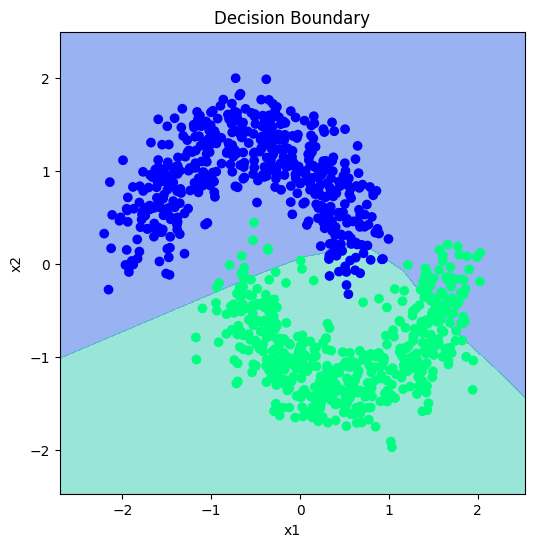

In [ ]:

plot_decision_boundary(mlp, X1, y1)


## **MLP (L1)**

**MLP with L1 regularization**

MLP with L1 regularization . L1 gird λ ∈ {1e−6, 3e−6, 1e−5, 3e−5, 1e−4, 3e−4}. Report layerwise sparsity and validation AUROC vs.  λ

In [ ]:
import numpy as np

class MLP_L1:
    def __init__(self, n_inputs, n_hidden, n_outputs, lr=0.01, lambda_=1e-5):
        self.hidden = Layer(n_inputs, n_hidden, activation='relu')
        self.output = Layer(n_hidden, n_outputs, activation='sigmoid')
        self.lr = lr
        self.lambda_ = lambda_

    def forward(self, X):
        hidden_out = self.hidden.forward(X)
        output_out = self.output.forward(hidden_out)
        return output_out

    def backward(self, X, y, y_pred):
        m = len(X)

        # Output Layer
        dZ2 = (y_pred - y) * self.output.activation_derivative(y_pred)
        dW2 = np.dot(self.hidden.last_output.T, dZ2) / m
        db2 = np.mean(dZ2, axis=0, keepdims=True)

        # L1 Penalty
        W2_current = np.array([n.w for n in self.output.neurons])
        dW2 += self.lambda_ * np.sign(W2_current.T)

        # Update output Layer
        for i, neuron in enumerate(self.output.neurons):
            neuron.w -= self.lr * dW2[:, i]
            neuron.b -= self.lr * db2[0, i]

        # Hidden Layer
        W2 = np.vstack([n.w.flatten() for n in self.output.neurons])
        dA1 = np.dot(dZ2, W2)
        dZ1 = dA1 * self.hidden.activation_derivative(self.hidden.last_output)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.mean(dZ1, axis=0, keepdims=True)

        # L1 Penalty
        W1_current = np.array([n.w for n in self.hidden.neurons])
        dW1 += self.lambda_ * np.sign(W1_current.T)

        # Update hidden Layer
        for i, neuron in enumerate(self.hidden.neurons):
            neuron.w -= self.lr * dW1[:, i]
            neuron.b -= self.lr * db1[0, i]


In [ ]:
def compute_sparsity(layer, threshold=1e-3):
    weights = np.array([n.w for n in layer.neurons])
    zero_like = np.sum(np.abs(weights) < threshold)
    total = weights.size
    return zero_like / total

def compute_sparsity(weights, threshold=1e-3):
    zero_like = np.sum(np.abs(weights) < threshold)
    total = weights.size
    return zero_like / total



### **Test & Train**

### Results


Training with λ = 1.0e-06
Epoch    0 | Train Loss: 0.709717 | Val Loss: 0.693701
Epoch  100 | Train Loss: 0.705830 | Val Loss: 0.693585
Epoch  200 | Train Loss: 0.702423 | Val Loss: 0.693507
Epoch  300 | Train Loss: 0.699361 | Val Loss: 0.693459
Epoch  400 | Train Loss: 0.696495 | Val Loss: 0.693437
Validation AUROC: 0.3452
Hidden layer sparsity: 0.0000%
Output layer sparsity: 0.0000%

Training with λ = 3.0e-06
Epoch    0 | Train Loss: 0.674273 | Val Loss: 0.693602
Early stopping at epoch 50
Validation AUROC: 0.9975
Hidden layer sparsity: 0.0000%
Output layer sparsity: 10.0000%

Training with λ = 1.0e-05
Epoch    0 | Train Loss: 0.687376 | Val Loss: 0.693023
Early stopping at epoch 50
Validation AUROC: 0.8437
Hidden layer sparsity: 0.0000%
Output layer sparsity: 0.0000%

Training with λ = 3.0e-05
Epoch    0 | Train Loss: 0.685191 | Val Loss: 0.693169
Early stopping at epoch 50
Validation AUROC: 0.9206
Hidden layer sparsity: 0.0000%
Output layer sparsity: 0.0000%

Training with λ = 1.0

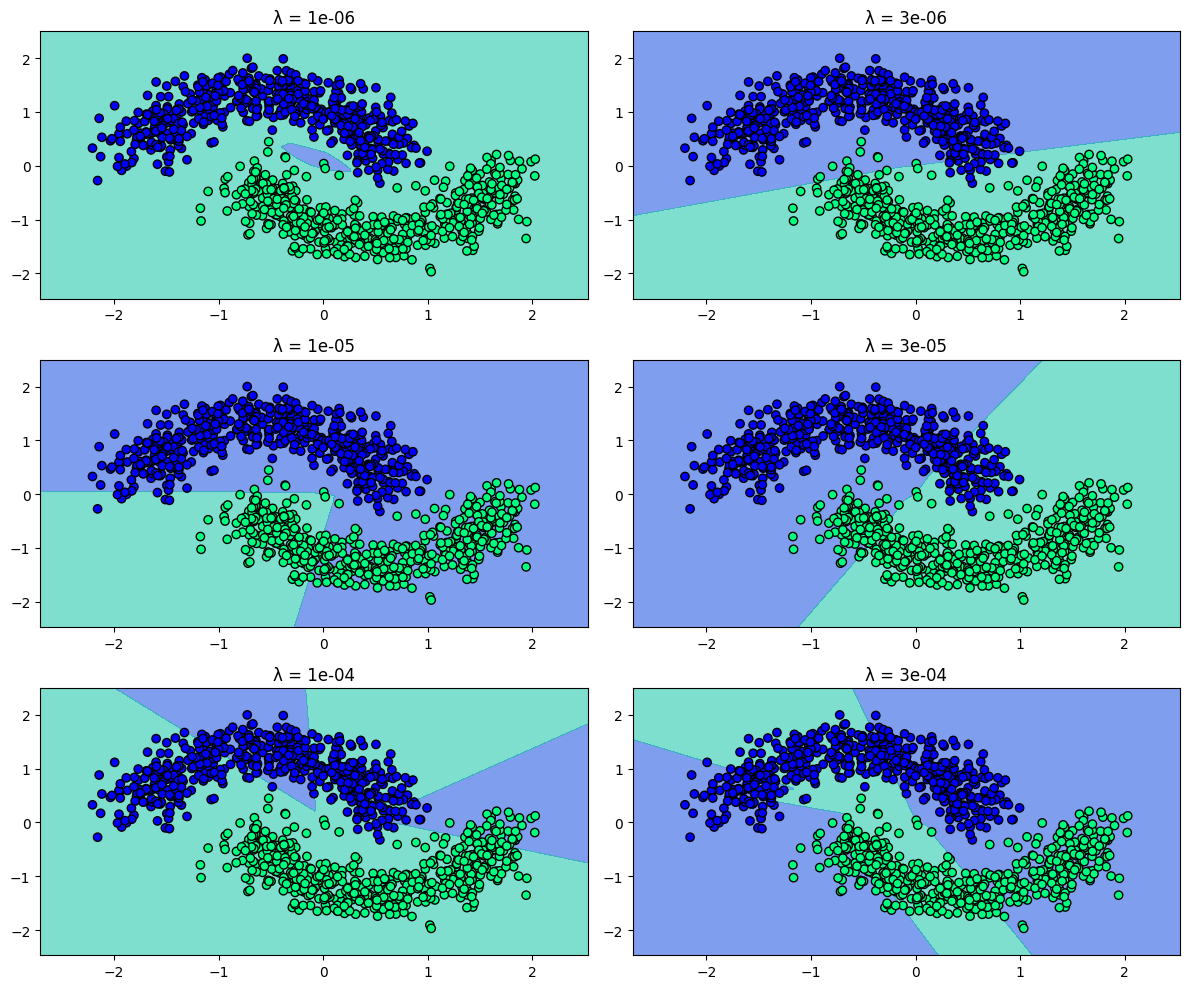

In [ ]:
from sklearn.metrics import roc_auc_score

X1, y1 = make_moons_from_cosine(n_samples=1000, noise=0.2, seed=1337)
X_train, y_train, X_test, y_test = split_train_test(X1, y1, factor=0.5,seed=1337)
mean = np.mean(X_train, axis=0)
std  = np.std(X_train, axis=0)
X_train = standardize_data(X_train, mean, std)
X_test  = standardize_data(X_test, mean, std)
X1 = standardize_data(X1, mean, std)
X_train, y_train, X_valid, y_valid = split_train_validation(X_train_01, y_train_01, factor = 0.2, seed = 1337)


y_train = y_train.reshape(-1, 1)
y_valid = y_valid.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

lambdas = [1e-6, 3e-6, 1e-5, 3e-5, 1e-4, 3e-4]
fig, ax = plt.subplots(3, 2, figsize=(12, 10))

auroc_scores = []
hidden_sparsities = []
output_sparsities = []

for i, lam in enumerate(lambdas):
    print(f"\nTraining with λ = {lam:.1e}")
    mlp = MLP_L1(n_inputs=2, n_hidden=10, n_outputs=1, lr=0.01, lambda_=lam)

    train(mlp, X_train, y_train, X_valid, y_valid, epochs=500, patience=50)

    # Validation
    y_valid_pred = mlp.forward(X_valid)
    auroc = roc_auc_score(y_valid, y_valid_pred)
    auroc_scores.append(auroc)

    hidden_weights = np.array([n.w for n in mlp.hidden.neurons]).flatten()
    output_weights = np.array([n.w for n in mlp.output.neurons]).flatten()
    hidden_sparsity = compute_sparsity(hidden_weights)
    output_sparsity = compute_sparsity(output_weights)
    hidden_sparsities.append(hidden_sparsity)
    output_sparsities.append(output_sparsity)

    print(f"Validation AUROC: {auroc:.4f}")
    print(f"Hidden layer sparsity: {hidden_sparsity*100:.4f}%")
    print(f"Output layer sparsity: {output_sparsity*100:.4f}%")

    # --- Decision boundary ---
    x_min, x_max = X1[:, 0].min() - 0.5, X1[:, 0].max() + 0.5
    y_min, y_max = X1[:, 1].min() - 0.5, X1[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = mlp.forward(grid_points).reshape(xx.shape)

    row, col = divmod(i, 2)
    ax[row, col].contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.5, cmap='winter')
    ax[row, col].scatter(X1[:, 0], X1[:, 1], c=y1.squeeze(), cmap='winter', edgecolors='k')
    ax[row, col].set_title(f"λ = {lam:.0e}")
    ax[row, col].set_xlim(x_min, x_max)
    ax[row, col].set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()


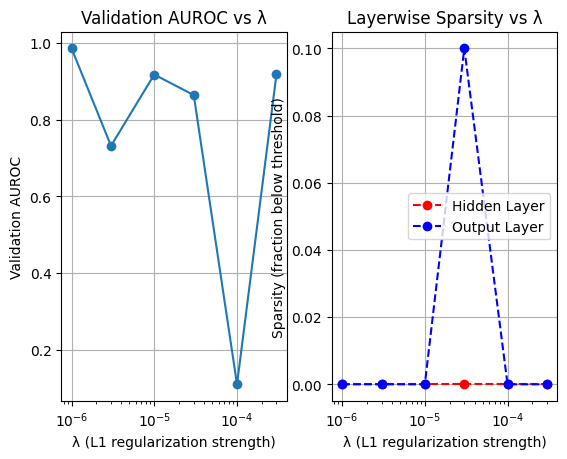

In [ ]:
# AUROC vs lambda
plt.subplot(1, 2, 1)
plt.semilogx(lambdas, auroc_scores, marker='o')
plt.xlabel("λ (L1 regularization strength)")
plt.ylabel("Validation AUROC")
plt.title("Validation AUROC vs λ")
plt.grid(True)

# Sparsity vs lambda
plt.subplot(1, 2, 2)
plt.semilogx(lambdas, hidden_sparsities, 'r--o', label='Hidden Layer')
plt.semilogx(lambdas, output_sparsities, 'b--o', label='Output Layer')
plt.xlabel("λ (L1 regularization strength)")
plt.ylabel("Sparsity (fraction below threshold)")
plt.title("Layerwise Sparsity vs λ")
plt.legend()
plt.grid(True)

plt.show()

## MLP (L2)

**MLP with L2 regularization**

In [ ]:
class MLP_L2:
    def __init__(self, n_inputs, n_hidden, n_outputs, lr=0.01, lambda_=1e-4):
        self.hidden = Layer(n_inputs, n_hidden, activation='relu')
        self.output = Layer(n_hidden, n_outputs, activation='sigmoid')
        self.lr = lr
        self.lambda_ = lambda_

    def forward(self, X):
        hidden_out = self.hidden.forward(X)
        output_out = self.output.forward(hidden_out)
        return output_out

    def backward(self, X, y, y_pred):
        m = len(X)

        # Output Layer
        dZ2 = (y_pred - y) * self.output.activation_derivative(y_pred)
        dW2 = np.dot(self.hidden.last_output.T, dZ2) / m
        db2 = np.mean(dZ2, axis=0, keepdims=True)

        # Update Output Layer
        for i, neuron in enumerate(self.output.neurons):
            dW_i = dW2[:, i] + (self.lambda_ / m) * neuron.w
            neuron.w -= self.lr * dW_i
            neuron.b -= self.lr * db2[0, i]

        # Hidden Layer
        W2 = np.vstack([n.w.flatten() for n in self.output.neurons])
        dA1 = np.dot(dZ2, W2)
        dZ1 = dA1 * self.hidden.activation_derivative(self.hidden.last_output)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.mean(dZ1, axis=0, keepdims=True)

        # Update Hidden Layer
        for i, neuron in enumerate(self.hidden.neurons):
            dW_i = dW1[:, i] + (self.lambda_ / m) * neuron.w
            neuron.w -= self.lr * dW_i
            neuron.b -= self.lr * db1[0, i]


### **Test & Train**


Training with λ = 0.0e+00
Epoch    0 | Train Loss: 0.698111 | Val Loss: 0.693101
Epoch  100 | Train Loss: 0.693296 | Val Loss: 0.693065
Epoch  200 | Train Loss: 0.688606 | Val Loss: 0.693062
Early stopping at epoch 211
Validation AUROC: 0.5972

Training with λ = 1.0e-06
Epoch    0 | Train Loss: 0.697004 | Val Loss: 0.693061
Early stopping at epoch 50
Validation AUROC: 0.6323

Training with λ = 3.0e-06
Epoch    0 | Train Loss: 0.684762 | Val Loss: 0.693449
Early stopping at epoch 50
Validation AUROC: 0.9425

Training with λ = 1.0e-05
Epoch    0 | Train Loss: 0.680798 | Val Loss: 0.693351
Early stopping at epoch 50
Validation AUROC: 1.0000

Training with λ = 3.0e-05
Epoch    0 | Train Loss: 0.686463 | Val Loss: 0.693110
Early stopping at epoch 50
Validation AUROC: 0.8793

Training with λ = 1.0e-04
Epoch    0 | Train Loss: 0.704034 | Val Loss: 0.693082
Epoch  100 | Train Loss: 0.699999 | Val Loss: 0.693072
Early stopping at epoch 141
Validation AUROC: 0.1126

Training with λ = 3.0e-04
Ep

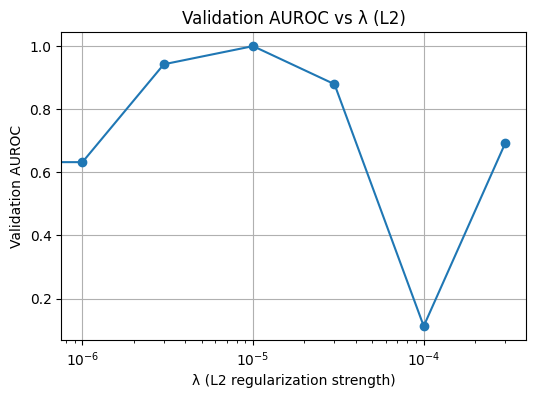

In [ ]:
X1, y1 = make_moons_from_cosine(n_samples=1000, noise=0.2, seed=1337)
X_train, y_train, X_test, y_test = split_train_test(X1, y1, factor=0.5,seed=1337)
mean = np.mean(X_train, axis=0)
std  = np.std(X_train, axis=0)
X_train = standardize_data(X_train, mean, std)
X_test  = standardize_data(X_test, mean, std)
X1 = standardize_data(X1, mean, std)
X_train, y_train, X_valid, y_valid = split_train_validation(X_train_01, y_train_01, factor = 0.2, seed = 1337)


y_train = y_train.reshape(-1, 1)
y_valid = y_valid.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)


lambdas = [0.0, 1e-6, 3e-6, 1e-5, 3e-5, 1e-4, 3e-4]

auroc_scores = []

for lam in lambdas:
    print(f"\nTraining with λ = {lam:.1e}")
    mlp = MLP_L2(n_inputs=2, n_hidden=10, n_outputs=1, lr=0.01, lambda_=lam)

    train(mlp, X_train, y_train, X_valid, y_valid, epochs=500, patience=50)

    y_valid_pred = mlp.forward(X_valid)
    auroc = roc_auc_score(y_valid, y_valid_pred)
    auroc_scores.append(auroc)

    print(f"Validation AUROC: {auroc:.4f}")

# ---- Pick Best λ ----
best_lambda = lambdas[np.argmax(auroc_scores)]
best_auroc = np.max(auroc_scores)

print(f"\n Best λ = {best_lambda:.1e} with Validation AUROC = {best_auroc:.4f}")

# ---- Plot Results ----
plt.figure(figsize=(6,4))
plt.semilogx(lambdas, auroc_scores, marker='o')
plt.xlabel("λ (L2 regularization strength)")
plt.ylabel("Validation AUROC")
plt.title("Validation AUROC vs λ (L2)")
plt.grid(True)
plt.show()


### **Results**

Epoch    0 | Train Loss: 0.695534 | Val Loss: 0.693200
Epoch  100 | Train Loss: 0.693650 | Val Loss: 0.693165
Epoch  200 | Train Loss: 0.691773 | Val Loss: 0.693139
Epoch  300 | Train Loss: 0.689852 | Val Loss: 0.693120
Epoch  400 | Train Loss: 0.687833 | Val Loss: 0.693108


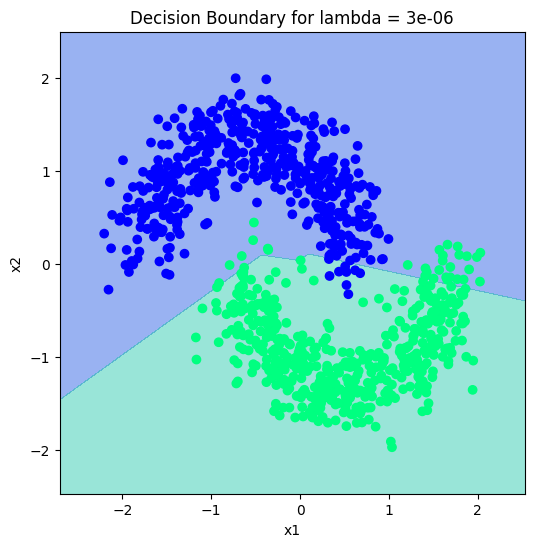

Validation AUROC: 0.9994
Test Accuracy: 0.916


In [ ]:
lam = 3e-6
mlp = MLP_L2(n_inputs=2, n_hidden=10, n_outputs=1, lr=0.01, lambda_=lam)
train(mlp, X_train, y_train, X_valid, y_valid, epochs=500, patience=50)
y_valid_pred = mlp.forward(X_valid)
auroc = roc_auc_score(y_valid, y_valid_pred)
title_lam = f"Decision Boundary for lambda = {lam}"
plot_decision_boundary(mlp, X1, y1, title=title_lam)
print(f"Validation AUROC: {auroc:.4f}")
test_acc = accuracy(y_test, y_test_pred)
print(f"Test Accuracy: {test_acc:.3f}")

## Logistic regression

**Logistic regression with polynomial features**


In [ ]:
def polynomial_features(X, degree=2):
    x1, x2 = X[:, 0], X[:, 1]
    features = [np.ones_like(x1)]

    for d in range(1, degree + 1):
        for i in range(d + 1):
            features.append((x1 ** (d - i)) * (x2 ** i))

    return np.vstack(features).T


class LogisticRegressionPoly:
    def __init__(self, degree=2, lr=0.1, n_iter=1000):
        self.degree = degree
        self.lr = lr
        self.n_iter = n_iter

    def sigmoid(self, z):
        z = np.clip(z, -20, 20)
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        X_poly = polynomial_features(X, self.degree)
        y = y.flatten()
        n_samples, n_features = X_poly.shape
        self.w = np.zeros(n_features)

        for i in range(self.n_iter):
            z = np.dot(X_poly, self.w)
            y_pred = self.sigmoid(z)

            grad = np.dot(X_poly.T, (y_pred - y)) / n_samples
            self.w -= self.lr * grad

            if i % 200 == 0 or i == self.n_iter - 1:
                loss = -np.mean(
                    y * np.log(y_pred) +
                    (1 - y) * np.log(1 - y_pred)
                )
                print(f"Epoch {i:4d} | Loss: {loss:.4f}")

    def predict_proba(self, X):
        X_poly = polynomial_features(X, self.degree)
        return self.sigmoid(np.dot(X_poly, self.w))

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)


def plot_decision_boundary(model, X, y, degree=2, resolution=200):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, resolution),
        np.linspace(y_min, y_max, resolution)
    )

    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model.predict_proba(grid).reshape(xx.shape)

    plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], cmap='winter', alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', edgecolors='k')
    plt.title(f"Decision Boundary (degree={degree})")
    plt.show()


### **Test & Train**

### Results

Epoch    0 | Loss: 0.6931
Epoch  200 | Loss: 0.0752
Epoch  400 | Loss: 0.0512
Epoch  600 | Loss: 0.0398
Epoch  800 | Loss: 0.0328
Epoch 1000 | Loss: 0.0281
Epoch 1200 | Loss: 0.0247
Epoch 1400 | Loss: 0.0220
Epoch 1600 | Loss: 0.0199
Epoch 1800 | Loss: 0.0182
Epoch 1999 | Loss: 0.0168


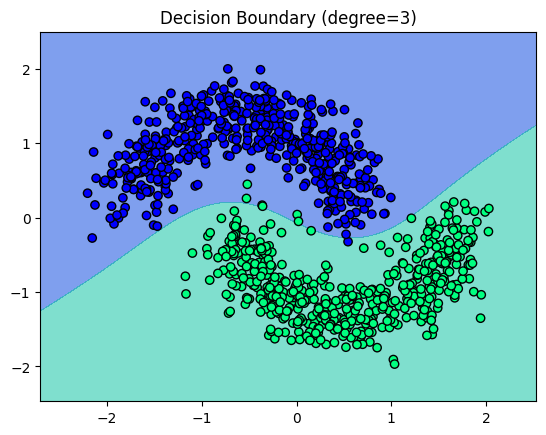

Accuracy is 0.9930


In [ ]:
X1, y1 = make_moons_from_cosine(n_samples=1000, noise=0.2, seed=1337)
X_train, y_train, X_test, y_test = split_train_test(X1, y1, factor=0.5,seed=1337)
mean = np.mean(X_train, axis=0)
std  = np.std(X_train, axis=0)
X_train = standardize_data(X_train, mean, std)
X_test  = standardize_data(X_test, mean, std)
X1 = standardize_data(X1, mean, std)
X_train, y_train, X_valid, y_valid = split_train_validation(X_train_01, y_train_01, factor = 0.2, seed = 1337)


y_train = y_train.reshape(-1, 1)
y_valid = y_valid.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)


model = LogisticRegressionPoly(degree=3, lr=0.1, n_iter=2000)
model.fit(X_train, y_train)
plot_decision_boundary(model, X1, y1, degree=3)

y_test_pred = model.predict(X1)
test_acc = accuracy(y1, y_test_pred)
print(f"Accuracy is {test_acc:.4f}")

# **Evaluation and Analysis**

## Evaluate test accuracy on noise = 0.20, and robustness accuracy on 0.10 & 0.30.

## Create a table with test accuracy for the four models on the three test noise levels. Include parameter count.

In [ ]:
from sklearn.metrics import accuracy_score

#Datasets generation
X_01, y_01 = make_moons_from_cosine(n_samples=1000, noise=0.1, seed=1337)
X_02, y_02 = make_moons_from_cosine(n_samples=1000, noise=0.2, seed=1337)
X_03, y_03 = make_moons_from_cosine(n_samples=1000, noise=0.3, seed=1337)

# ---------- Noise = 0.1 ----------
X_train_01, y_train_01, X_test_01, y_test_01 = split_train_test(X_01, y_01, factor=0.5,seed=1337)
mean = np.mean(X_train_01, axis=0)
std  = np.std(X_train_01, axis=0)
X_train_01 = standardize_data(X_train_01, mean, std)
X_test_01  = standardize_data(X_test_01, mean, std)
X_train_01, y_train_01, X_valid_01, y_valid_01 = split_train_validation(X_train_01, y_train_01, factor = 0.2, seed = 1337)

# ---------- Noise = 0.2 ----------
X_train_02, y_train_02, X_test_02, y_test_02 = split_train_test(X_02, y_02, factor=0.5,seed=1337)
mean = np.mean(X_train_02, axis=0)
std  = np.std(X_train_02, axis=0)
X_train_02 = standardize_data(X_train_02, mean, std)
X_test_02  = standardize_data(X_test_02, mean, std)
X_train_02, y_train_02, X_valid_02, y_valid_02 = split_train_validation(X_train_02, y_train_02, factor = 0.2, seed = 1337)

# ---------- Noise = 0.3 ----------
X_train_03, y_train_03, X_test_03, y_test_03 = split_train_test(X_03, y_03, factor=0.5, seed=1337)
mean = np.mean(X_train_03, axis=0)
std  = np.std(X_train_03, axis=0)
X_train_03 = standardize_data(X_train_03, mean, std)
X_test_03  = standardize_data(X_test_03, mean, std)
X_train_03, y_train_03, X_valid_03, y_valid_03 = split_train_validation(X_train_03, y_train_03, factor=0.2, seed=1337)


def count_params(model):
    if hasattr(model, "hidden"):
        hidden_params = sum(len(n.w) + 1 for n in model.hidden.neurons)
        output_params = sum(len(n.w) + 1 for n in model.output.neurons)
        return hidden_params + output_params
    elif hasattr(model, "w"):
        return len(model.w)
    else:
        return 0

results = []
# -------------------------------------------------------
# Noise = 0.1 dataset
# -------------------------------------------------------
noise_label = 0.1
X_train, y_train = X_train_01, y_train_01
X_val, y_val = X_valid_01, y_valid_01
X_test, y_test = X_test_01, y_test_01

y_train = y_train.reshape(-1, 1)
y_valid = y_valid.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)


print("\n=== Training: MLP (Early Stopping) ===")
mlp = MLP(n_inputs=2, n_hidden=10, n_outputs=1, lr=0.01)
train(mlp, X_train, y_train, X_val, y_val, epochs=500, patience=50)

y_pred = (mlp.forward(X_test) > 0.5).astype(int)
acc = accuracy_score(y_test, y_pred)
params = count_params(mlp)
results.append(["MLP (Early Stop)", noise_label, acc, params])

print("\n=== Training: MLP (L1 Regularization) ===")
mlp_l1 = MLP_L1(n_inputs=2, n_hidden=10, n_outputs=1, lr=0.01, lambda_=3e-5)
train(mlp_l1, X_train, y_train, X_val, y_val, epochs=500, patience=50)

y_pred = (mlp_l1.forward(X_test) > 0.5).astype(int)
acc = accuracy_score(y_test, y_pred)
params = count_params(mlp_l1)
results.append(["MLP (L1)", noise_label, acc, params])

print("\n=== Training: MLP (L2 Regularization) ===")
mlp_l2 = MLP_L2(n_inputs=2, n_hidden=10, n_outputs=1, lr=0.01, lambda_=1e-4)
train(mlp_l2, X_train, y_train, X_val, y_val, epochs=500, patience=50)

y_pred = (mlp_l2.forward(X_test) > 0.5).astype(int)
acc = accuracy_score(y_test, y_pred)
params = count_params(mlp_l2)
results.append(["MLP (L2)", noise_label, acc, params])

print("\n=== Training: Logistic Regression (Polynomial) ===")
logreg = LogisticRegressionPoly(degree=3, lr=0.1, n_iter=2000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
acc = accuracy_score(y_test, y_pred)
params = count_params(logreg)
results.append(["Logistic Regression (Poly)", noise_label, acc, params])




# -------------------------------------------------------
# Noise = 0.2 dataset
# -------------------------------------------------------
noise_label = 0.2
X_train, y_train = X_train_02, y_train_02
X_val, y_val = X_valid_02, y_valid_02
X_test, y_test = X_test_02, y_test_02

y_train = y_train.reshape(-1, 1)
y_valid = y_valid.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)


print("\n=== Training: MLP (Early Stopping) ===")
mlp = MLP(n_inputs=2, n_hidden=10, n_outputs=1, lr=0.01)
train(mlp, X_train, y_train, X_val, y_val, epochs=500, patience=50)

y_pred = (mlp.forward(X_test) > 0.5).astype(int)
acc = accuracy_score(y_test, y_pred)
params = count_params(mlp)
results.append(["MLP (Early Stop)", noise_label, acc, params])

print("\n=== Training: MLP (L1 Regularization) ===")
mlp_l1 = MLP_L1(n_inputs=2, n_hidden=10, n_outputs=1, lr=0.01, lambda_=3e-5)
train(mlp_l1, X_train, y_train, X_val, y_val, epochs=500, patience=50)

y_pred = (mlp_l1.forward(X_test) > 0.5).astype(int)
acc = accuracy_score(y_test, y_pred)
params = count_params(mlp_l1)
results.append(["MLP (L1)", noise_label, acc, params])

print("\n=== Training: MLP (L2 Regularization) ===")
mlp_l2 = MLP_L2(n_inputs=2, n_hidden=10, n_outputs=1, lr=0.01, lambda_=1e-4)
train(mlp_l2, X_train, y_train, X_val, y_val, epochs=500, patience=50)

y_pred = (mlp_l2.forward(X_test) > 0.5).astype(int)
acc = accuracy_score(y_test, y_pred)
params = count_params(mlp_l2)
results.append(["MLP (L2)", noise_label, acc, params])

print("\n=== Training: Logistic Regression (Polynomial) ===")
logreg = LogisticRegressionPoly(degree=3, lr=0.1, n_iter=2000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
acc = accuracy_score(y_test, y_pred)
params = count_params(logreg)
results.append(["Logistic Regression (Poly)", noise_label, acc, params])


# -------------------------------------------------------
# Noise = 0.3 dataset
# -------------------------------------------------------
noise_label = 0.3
X_train, y_train = X_train_03, y_train_03
X_val, y_val = X_valid_03, y_valid_03
X_test, y_test = X_test_03, y_test_03

y_train = y_train.reshape(-1, 1)
y_valid = y_valid.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)


print("\n=== Training: MLP (Early Stopping) ===")
mlp = MLP(n_inputs=2, n_hidden=10, n_outputs=1, lr=0.01)
train(mlp, X_train, y_train, X_val, y_val, epochs=500, patience=50)

y_pred = (mlp.forward(X_test) > 0.5).astype(int)
acc = accuracy_score(y_test, y_pred)
params = count_params(mlp)
results.append(["MLP (Early Stop)", noise_label, acc, params])

print("\n=== Training: MLP (L1 Regularization) ===")
mlp_l1 = MLP_L1(n_inputs=2, n_hidden=10, n_outputs=1, lr=0.01, lambda_=3e-5)
train(mlp_l1, X_train, y_train, X_val, y_val, epochs=500, patience=50)

y_pred = (mlp_l1.forward(X_test) > 0.5).astype(int)
acc = accuracy_score(y_test, y_pred)
params = count_params(mlp_l1)
results.append(["MLP (L1)", noise_label, acc, params])

print("\n=== Training: MLP (L2 Regularization) ===")
mlp_l2 = MLP_L2(n_inputs=2, n_hidden=10, n_outputs=1, lr=0.01, lambda_=1e-4)
train(mlp_l2, X_train, y_train, X_val, y_val, epochs=500, patience=50)

y_pred = (mlp_l2.forward(X_test) > 0.5).astype(int)
acc = accuracy_score(y_test, y_pred)
params = count_params(mlp_l2)
results.append(["MLP (L2)", noise_label, acc, params])

print("\n=== Training: Logistic Regression (Polynomial) ===")
logreg = LogisticRegressionPoly(degree=3, lr=0.1, n_iter=2000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
acc = accuracy_score(y_test, y_pred)
params = count_params(logreg)
results.append(["Logistic Regression (Poly)", noise_label, acc, params])


df_results = pd.DataFrame(results, columns=["Model", "Noise Level", "Test Accuracy", "Parameter Count"])
print(f"\n===== Final Results =====")
print(df_results)



=== Training: MLP (Early Stopping) ===
Epoch    0 | Train Loss: 0.697224 | Val Loss: 0.693397
Epoch  100 | Train Loss: 0.694469 | Val Loss: 0.693383
Epoch  200 | Train Loss: 0.691791 | Val Loss: 0.693381
Early stopping at epoch 209

=== Training: MLP (L1 Regularization) ===
Epoch    0 | Train Loss: 0.692790 | Val Loss: 0.693204
Early stopping at epoch 50

=== Training: MLP (L2 Regularization) ===
Epoch    0 | Train Loss: 0.697066 | Val Loss: 0.693158
Early stopping at epoch 50

=== Training: Logistic Regression (Polynomial) ===
Epoch    0 | Loss: 0.6931
Epoch  200 | Loss: 0.0783
Epoch  400 | Loss: 0.0528
Epoch  600 | Loss: 0.0408
Epoch  800 | Loss: 0.0335
Epoch 1000 | Loss: 0.0286
Epoch 1200 | Loss: 0.0251
Epoch 1400 | Loss: 0.0223
Epoch 1600 | Loss: 0.0202
Epoch 1800 | Loss: 0.0184
Epoch 1999 | Loss: 0.0170

=== Training: MLP (Early Stopping) ===
Epoch    0 | Train Loss: 0.688648 | Val Loss: 0.693282
Epoch  100 | Train Loss: 0.683304 | Val Loss: 0.693254
Early stopping at epoch 141



## **Plot decision boundaries**

Plot decision boundaries side by side for all 4 models with default noise 0.2.



=== Training: MLP (Early Stopping) ===
Epoch    0 | Train Loss: 0.687926 | Val Loss: 0.693810
Early stopping at epoch 100

=== Training: MLP (L1) ===
Epoch    0 | Train Loss: 0.700043 | Val Loss: 0.693097
Epoch  100 | Train Loss: 0.693107 | Val Loss: 0.693120
Early stopping at epoch 117

=== Training: MLP (L2) ===
Epoch    0 | Train Loss: 0.700714 | Val Loss: 0.693095
Epoch  100 | Train Loss: 0.697268 | Val Loss: 0.693063
Epoch  200 | Train Loss: 0.694099 | Val Loss: 0.693045
Epoch  300 | Train Loss: 0.691096 | Val Loss: 0.693038
Epoch  400 | Train Loss: 0.688195 | Val Loss: 0.693043
Early stopping at epoch 408

=== Training: Logistic Regression (Polynomial) ===
Epoch    0 | Loss: 0.6931
Epoch  200 | Loss: 0.0966
Epoch  400 | Loss: 0.0698
Epoch  600 | Loss: 0.0569
Epoch  800 | Loss: 0.0490
Epoch 1000 | Loss: 0.0435
Epoch 1200 | Loss: 0.0395
Epoch 1400 | Loss: 0.0363
Epoch 1600 | Loss: 0.0338
Epoch 1800 | Loss: 0.0317
Epoch 1999 | Loss: 0.0299


Text(0.5, 1.0, 'Logistic Regression - Degree 3')

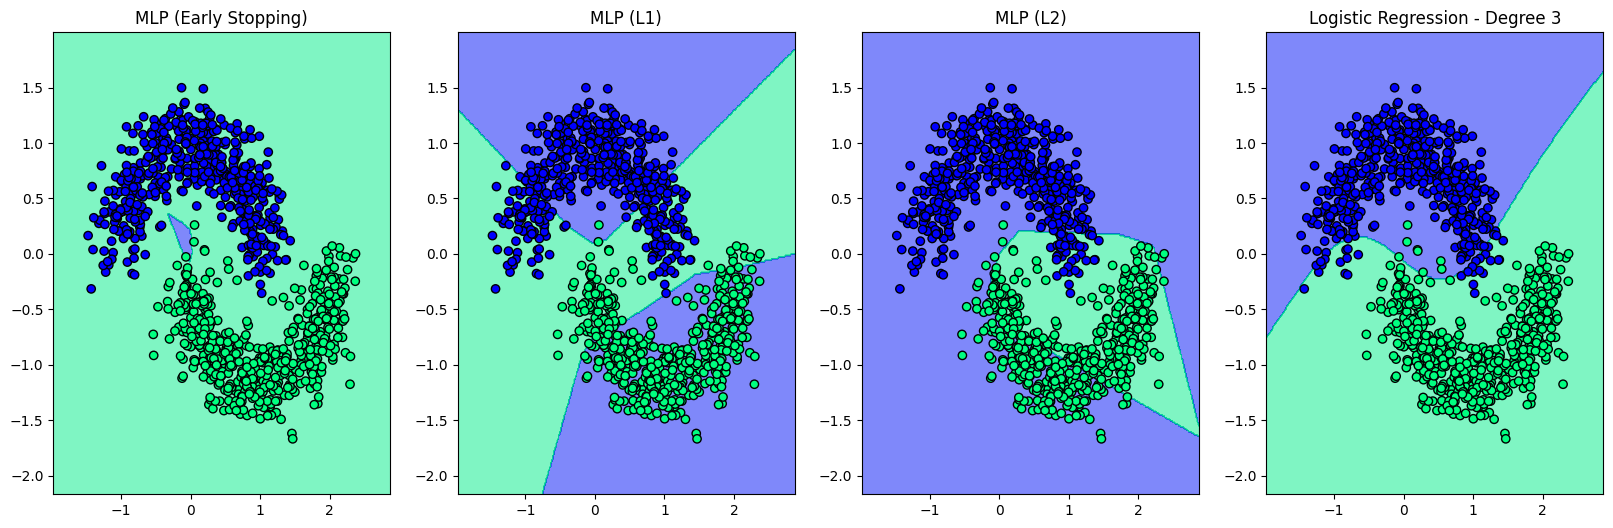

In [ ]:
#Dataset - 02
# -------------------------------------------------------
# Noise = 0.2 dataset
# -------------------------------------------------------
noise_label = 0.2
X_train, y_train = X_train_02, y_train_02
X_val, y_val = X_valid_02, y_valid_02
X_test, y_test = X_test_02, y_test_02

y_train = y_train.reshape(-1, 1)
y_valid = y_valid.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

#MLP - Early Stopping
print("\n=== Training: MLP (Early Stopping) ===")
mlp1 = MLP(n_inputs=2, n_hidden=10, n_outputs=1, lr=0.01)
train(mlp1, X_train, y_train, X_val, y_val, epochs=500, patience=100)

x_min, x_max = X_02[:, 0].min() - 0.5, X_02[:, 0].max() + 0.5
y_min, y_max = X_02[:, 1].min() - 0.5, X_02[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = (mlp1.forward(grid_points) > 0.5).astype(int)
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(1,4, figsize=(20,6))
ax[0].contourf(xx, yy, Z, cmap='winter', alpha=0.5)
ax[0].scatter(X_02[:, 0], X_02[:,1], c=y_02, cmap='winter', edgecolors='k')
ax[0].set_title("MLP (Early Stopping)")

print("\n=== Training: MLP (L1) ===")
mlp_l1 = MLP_L1(n_inputs=2, n_hidden=10, n_outputs=1, lr=0.01, lambda_=3e-5)
train(mlp_l1, X_train, y_train, X_val, y_val, epochs=500, patience=100)

x_min, x_max = X_02[:, 0].min() - 0.5, X_02[:, 0].max() + 0.5
y_min, y_max = X_02[:, 1].min() - 0.5, X_02[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = (mlp_l1.forward(grid_points) > 0.5).astype(int)
Z = Z.reshape(xx.shape)
ax[1].contourf(xx, yy, Z, cmap='winter', alpha=0.5)
ax[1].scatter(X_02[:, 0], X_02[:,1], c=y_02, cmap='winter', edgecolors='k')
ax[1].set_title("MLP (L1)")

print("\n=== Training: MLP (L2) ===")
mlp_l2 = MLP_L2(n_inputs=2, n_hidden=10, n_outputs=1, lr=0.01, lambda_=3e-5)
train(mlp_l2, X_train, y_train, X_val, y_val, epochs=500, patience=100)

x_min, x_max = X_02[:, 0].min() - 0.5, X_02[:, 0].max() + 0.5
y_min, y_max = X_02[:, 1].min() - 0.5, X_02[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = (mlp_l2.forward(grid_points) > 0.5).astype(int)
Z = Z.reshape(xx.shape)
ax[2].contourf(xx, yy, Z, cmap='winter', alpha=0.5)
ax[2].scatter(X_02[:, 0], X_02[:,1], c=y_02, cmap='winter', edgecolors='k')
ax[2].set_title("MLP (L2)")

print("\n=== Training: Logistic Regression (Polynomial) ===")
logreg = LogisticRegressionPoly(degree=3, lr=0.1, n_iter=2000)
logreg.fit(X_train, y_train)

x_min, x_max = X_02[:, 0].min() - 0.5, X_02[:, 0].max() + 0.5
y_min, y_max = X_02[:, 1].min() - 0.5, X_02[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = logreg.predict(grid_points)
Z = Z.reshape(xx.shape)
ax[3].contourf(xx, yy, Z, cmap='winter', alpha=0.5)
ax[3].scatter(X_02[:, 0], X_02[:,1], c=y_02, cmap='winter', edgecolors='k')
ax[3].set_title("Logistic Regression - Degree 3")

## Class Imbalanace

Add class imbalance (70:30) in the trainset while keeping the testset balanced. Report accuracy and AUROC and discuss the effect of imbalance.


In [ ]:
def make_imbalanced_split(X, y, ratio_class1=0.7, train_ratio=0.5, seed=1337):
    rng = np.random.default_rng(seed)

    perm = rng.permutation(len(y))
    X = X[perm]
    y = y[perm]

    class0_idx = np.where(y == 0)[0]
    class1_idx = np.where(y == 1)[0]

    n_train = int(len(y) * train_ratio)
    n_class1_train = int(n_train * ratio_class1)
    n_class0_train = n_train - n_class1_train

    train_idx_1 = rng.choice(class1_idx, size=n_class1_train, replace=False)
    train_idx_0 = rng.choice(class0_idx, size=n_class0_train, replace=False)

    train_idx = np.concatenate([train_idx_0, train_idx_1])
    test_idx = np.array([i for i in range(len(y)) if i not in train_idx])

    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]

    return X_train, y_train, X_test, y_test


In [ ]:
X1, y1 = make_moons_from_cosine(n_samples=1000, noise=0.2, seed=1337)
X_train, y_train, X_test, y_test = make_imbalanced_split(X1, y1, ratio_class1=0.7, train_ratio=0.5)
X_train, y_train, X_valid, y_valid = split_train_validation(X_train, y_train, factor = 0.2, seed = 1337)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("Train class distribution:", np.bincount(y_train.flatten()))
print("Test class distribution:", np.bincount(y_test.flatten()))


Train shape: (400, 2) Test shape: (500, 2)
Train class distribution: [119 281]
Test class distribution: [350 150]



=== Training: MLP (Early Stopping) ===
Epoch    0 | Train Loss: 0.704797 | Val Loss: 0.693390
Early stopping at epoch 100

=== Training: MLP (L1) ===
Epoch    0 | Train Loss: 0.706158 | Val Loss: 0.693063
Early stopping at epoch 100

=== Training: MLP (L2) ===
Epoch    0 | Train Loss: 0.702768 | Val Loss: 0.693146
Early stopping at epoch 100

=== Training: Logistic Regression (Polynomial) ===
Epoch    0 | Loss: 0.6931
Epoch  200 | Loss: 0.1234
Epoch  400 | Loss: 0.0878
Epoch  600 | Loss: 0.0717
Epoch  800 | Loss: 0.0620
Epoch 1000 | Loss: 0.0553
Epoch 1200 | Loss: 0.0504
Epoch 1400 | Loss: 0.0466
Epoch 1600 | Loss: 0.0435
Epoch 1800 | Loss: 0.0409
Epoch 1999 | Loss: 0.0388


Text(0.5, 1.0, 'Logistic Regression - Degree 3')

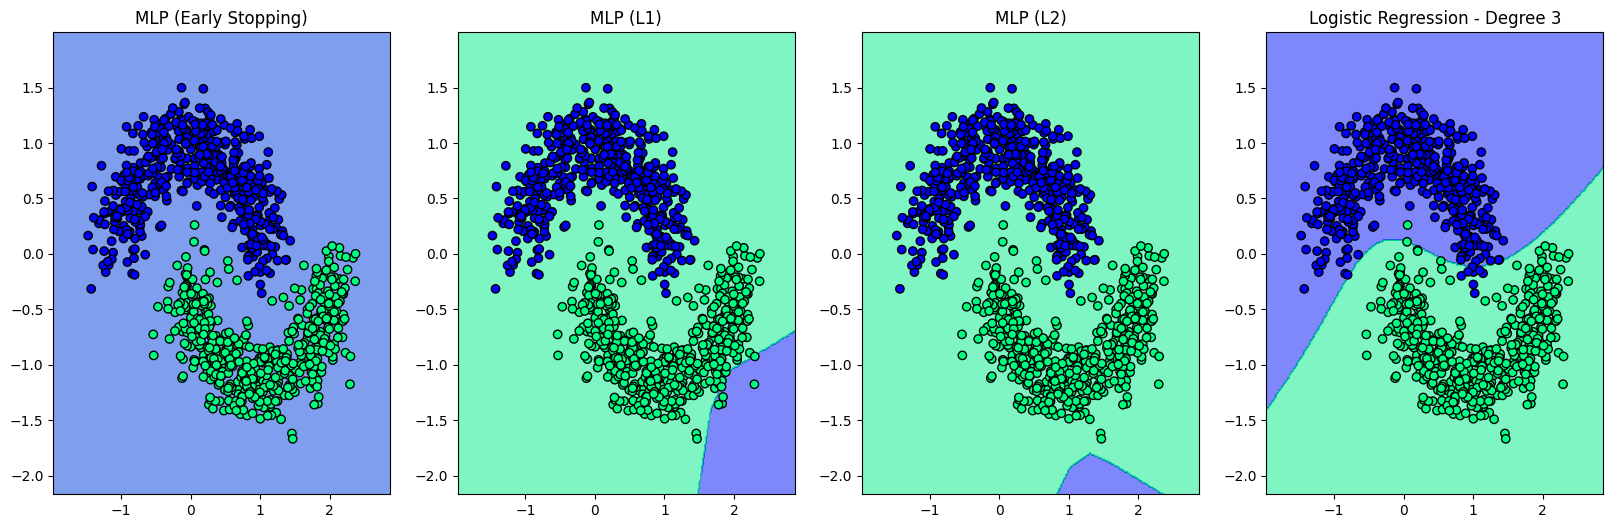

In [ ]:
y_train = y_train.reshape(-1, 1)
y_valid = y_valid.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

#MLP - Early Stopping
print("\n=== Training: MLP (Early Stopping) ===")
mlp1 = MLP(n_inputs=2, n_hidden=10, n_outputs=1, lr=0.01)
train(mlp1, X_train, y_train, X_val, y_val, epochs=500, patience=100)

x_min, x_max = X_02[:, 0].min() - 0.5, X_02[:, 0].max() + 0.5
y_min, y_max = X_02[:, 1].min() - 0.5, X_02[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = (mlp1.forward(grid_points) > 0.5).astype(int)
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(1,4, figsize=(20,6))
ax[0].contourf(xx, yy, Z, cmap='winter', alpha=0.5)
ax[0].scatter(X_02[:, 0], X_02[:,1], c=y_02, cmap='winter', edgecolors='k')
ax[0].set_title("MLP (Early Stopping)")

print("\n=== Training: MLP (L1) ===")
mlp_l1 = MLP_L1(n_inputs=2, n_hidden=10, n_outputs=1, lr=0.01, lambda_=3e-5)
train(mlp_l1, X_train, y_train, X_val, y_val, epochs=500, patience=100)

x_min, x_max = X_02[:, 0].min() - 0.5, X_02[:, 0].max() + 0.5
y_min, y_max = X_02[:, 1].min() - 0.5, X_02[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = (mlp_l1.forward(grid_points) > 0.5).astype(int)
Z = Z.reshape(xx.shape)
ax[1].contourf(xx, yy, Z, cmap='winter', alpha=0.5)
ax[1].scatter(X_02[:, 0], X_02[:,1], c=y_02, cmap='winter', edgecolors='k')
ax[1].set_title("MLP (L1)")

print("\n=== Training: MLP (L2) ===")
mlp_l2 = MLP_L2(n_inputs=2, n_hidden=10, n_outputs=1, lr=0.01, lambda_=3e-5)
train(mlp_l2, X_train, y_train, X_val, y_val, epochs=500, patience=100)

x_min, x_max = X_02[:, 0].min() - 0.5, X_02[:, 0].max() + 0.5
y_min, y_max = X_02[:, 1].min() - 0.5, X_02[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = (mlp_l2.forward(grid_points) > 0.5).astype(int)
Z = Z.reshape(xx.shape)
ax[2].contourf(xx, yy, Z, cmap='winter', alpha=0.5)
ax[2].scatter(X_02[:, 0], X_02[:,1], c=y_02, cmap='winter', edgecolors='k')
ax[2].set_title("MLP (L2)")

print("\n=== Training: Logistic Regression (Polynomial) ===")
logreg = LogisticRegressionPoly(degree=3, lr=0.1, n_iter=2000)
logreg.fit(X_train, y_train)

x_min, x_max = X_02[:, 0].min() - 0.5, X_02[:, 0].max() + 0.5
y_min, y_max = X_02[:, 1].min() - 0.5, X_02[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = logreg.predict(grid_points)
Z = Z.reshape(xx.shape)
ax[3].contourf(xx, yy, Z, cmap='winter', alpha=0.5)
ax[3].scatter(X_02[:, 0], X_02[:,1], c=y_02, cmap='winter', edgecolors='k')
ax[3].set_title("Logistic Regression - Degree 3")